<a href="https://colab.research.google.com/github/MatthewR2D2/Tensorflow2Examples/blob/master/SimpleTextClassifiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
!pip install -q tensorflow==2.0.0-alpha0
import tensorflow as tf
from tensorflow import keras

import numpy as np

In [3]:
# Download the data set of words and split it between training and testing
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [4]:
# Data exploration
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))
print("Training data 0:", train_data[0])
print("Train data 0:{}, Train data 1:{}".format(len(train_data[0]), len(train_data[1])))

Training entries: 25000, labels: 25000
Training data 0: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Trai

In [5]:
# Method for coverting a interger back into a word
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

1646592/1641221 [==============================] - 0s 0us/step


In [6]:
# Simple Decode Test
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [7]:
# Data pre-procesing
# Convert the array of intergers into a tensor before feeding into a NN
# Pad the array so they all have the same lenght saving memory and time
def pad_array(array):
  return keras.preprocessing.sequence.pad_sequences(array,value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

train_data = pad_array(train_data)
test_data  = pad_array(test_data)

# Check lenght of differnt array
print("Array 1 Len: {} Array 2 Len {}".format(len(train_data[0]), len(train_data[1])))

Array 1 Len: 256 Array 2 Len 256


In [8]:
# Build model
vocab_size = 10000 

# Embedded layer take a interger-encoded vocab and finds embedded vector of the word
# GobalAverage pooling gives a fix lenght output vector for each example
# by averaging the sequence dimension handels input of varialbe lenght simply


model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [0]:
# compile the model
# Loss is for a binary classification problem
# binary_crossentropy is better at dealing with probabilities over mean squared error
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
# Build a validation set
x_val = train_data[:10000]
partial_x_train = train_data[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [11]:
# Train up the model
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 40,
                   batch_size = 512,
                   validation_data = (x_val, y_val),
                   verbose = 1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 90us/sample - loss: 0.6919 - accuracy: 0.5375 - val_loss: 0.6900 - val_accuracy: 0.6151
Epoch 2/40
15000/15000 [==============================] - 1s 68us/sample - loss: 0.6862 - accuracy: 0.6797 - val_loss: 0.6824 - val_accuracy: 0.6915
Epoch 3/40
15000/15000 [==============================] - 1s 69us/sample - loss: 0.6743 - accuracy: 0.7313 - val_loss: 0.6673 - val_accuracy: 0.7512
Epoch 4/40
15000/15000 [==============================] - 1s 75us/sample - loss: 0.6530 - accuracy: 0.7523 - val_loss: 0.6427 - val_accuracy: 0.7613
Epoch 5/40
15000/15000 [==============================] - 1s 79us/sample - loss: 0.6207 - accuracy: 0.7885 - val_loss: 0.6083 - val_accuracy: 0.7857
Epoch 6/40
15000/15000 [==============================] - 1s 83us/sample - loss: 0.5782 - accuracy: 0.8105 - val_loss: 0.5660 - val_accuracy: 0.8011
Epoch 7/40
15000/15000 [==============================] 

In [12]:
# Evaluate the model
results = model.evaluate(test_data, test_labels)
print(results)

25000/25000 [==============================] - 1s 40us/sample - loss: 0.3372 - accuracy: 0.8710
[0.3371920433807373, 0.87096]


In [14]:
# Graph the results
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

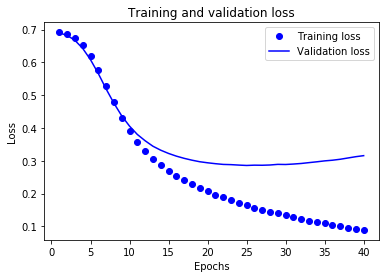

In [15]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

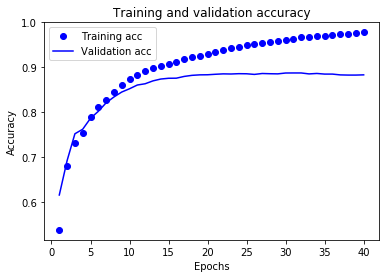

In [16]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()